# Laboratorio 5 - Análisis de sentimientos
Laura Tamath | Martín España | Sofia Rueda
###### Repo: https://github.com/lauratamath/HDT5_Data.git


In [1]:
# Correrlo solo una vez antes de correr el programa, luego ya pueden borrarlo
import nltk
nltk.download('all')
#nltk.download_shell()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/srue/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/srue/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/srue/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/srue/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/srue/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]

True

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import emoji
import random
import tensorflow
import torch
import time

from scipy import stats
from sklearn import metrics

from nltk.corpus import stopwords
from wordcloud import WordCloud
from tensorflow import keras
from transformers import BertTokenizer,BertModel, AdamW, get_linear_schedule_with_warmup

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import plot_model

from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

pd.options.display.max_rows = None


In [11]:
import pattern

In [12]:
# Cargando datos
train = pd.read_csv('./train.csv', encoding='utf8')
test = pd.read_csv('./test.csv', encoding='utf8')

stopWords = stopwords.words('english')

<AxesSubplot:>

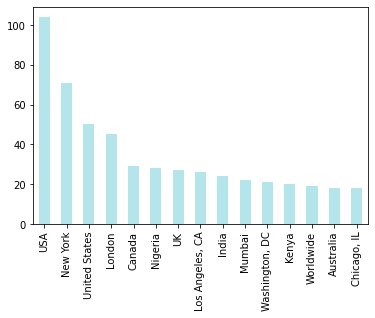

In [13]:
train['location'].value_counts().head(15).plot.bar(color="#B3E5EB")

<AxesSubplot:>

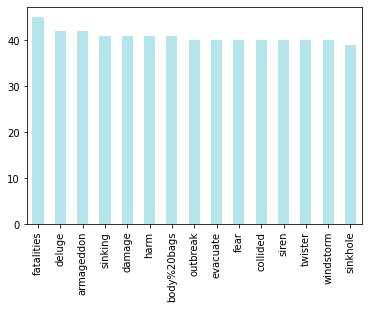

In [14]:
train['keyword'].value_counts().head(15).plot.bar(color="#B3E5EB")

<AxesSubplot:>

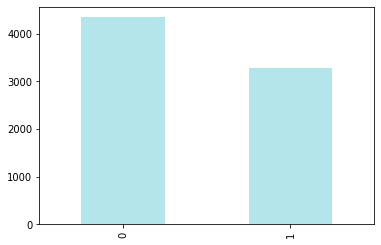

In [15]:
train['target'].value_counts().plot.bar(color="#B3E5EB")

In [16]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
5       #RockyFire Update => California Hwy. 20 closed...
6       #flood #disaster Heavy rain causes flash flood...
7       I'm on top of the hill and I can see a fire in...
8       There's an emergency evacuation happening now ...
9       I'm afraid that the tornado is coming to our a...
10            Three people died from the heat wave so far
11      Haha South Tampa is getting flooded hah- WAIT ...
12      #raining #flooding #Florida #TampaBay #Tampa 1...
13                #Flood in Bago Myanmar #We arrived Bago
14      Damage to school bus on 80 in multi car crash ...
15                                         What's up man?
16                                          I love fruits
17            

1. Limpie   y   preprocese   los   datos.  

In [17]:
train.columns
# ID       : id de cada tweet
# Text     : texto del tweet
# Location : ubicación desde la que se envió el tweet
# Keyword  : palabra clave del tweet
# Target   : esto denota si un tweet es sobre un desastre real (1) o no (0). Solo aplica en trains.scv

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [18]:
# Limpieza de location
def cleanLocation(value):
  try:

    if (
      'nan' in value or
      'world' in value or
      'global' in value or
      'everywhere' in value or
      'earth' in value or
      'ss' in value or
      '?' in value or
      re.search(r"[0-9]+", value, re.I)
    ):
      return 'unknow'

    if (
      'italy' in value
    ):
      return 'italy'

    if (
      'india' in value or
      'mumbai' in value
    ):
      return 'india'
    
    if (
      'switzerland' in value or
      'geneva' in value
    ):
      return 'switzerland'
    
    if (
      'china' in value or
      'hong kong' in value
    ):
      return 'china'

    if (
      'nigeria' in value or
      'lagos' in value
    ):
      return 'nigeria'

    if (
      'japan' in value or
      'tokyo' in value
    ):
      return 'japan'

    if (
      'ontario' in value or
      'canada' in value or
      'toronto' in value or
      'calgary' in value or
      'alberta' in value or
      re.search(r"ab$", value, re.I) or
      re.search(r"bc$", value, re.I)
    ):
      return 'canada'

    if (
      'uk' == value or
      'united kingdom' in value or
      'kingdom' in value or
      'british' in value or
      'scotland' in value or
      'newcastle' in value or
      'england' in value or
      'london' in value or
      re.search(r"uk$", value, re.I)
    ):
      return 'uk'

    if (
      'nyc' == value or
      'nj' == value or
      'united states' in value or
      'new york' in value or
      'san francisco' in value or
      'los angeles' in value or
      'new jersey' in value or
      'north carolina' in value or
      'st. louis' in value or
      'kansas city' in value or
      'san diego' in value or
      'las vegas' in value or
      'sacramento' in value or
      'oregon' in value or
      'michigan' in value or
      'manchester' in value or
      'portland' in value or
      'texas' in value or
      'u.s.' in value or
      'philippines' in value or
      'nevada' in value or
      'us' in value or
      'arizona' in value or
      'lincoln' in value or
      'wisconsin' in value or
      'pennsylvania' in value or
      'seattle' in value or
      'usa' in value or
      'washington' in value or
      'florida' in value or
      'chicago' in value or
      'california' in value or
      'nashville' in value or
      'colorado' in value or
      'denver' in value or
      'cleveland' in value or
      'atlanta' in value or
      'massachusetts' in value or
      'boston' in value or
      'oklahoma' in value or
      'tennessee' in value or
      'liverpool' in value or
      'phoenix' in value or
      'baltimore' in value or
      re.search(r"nyc$", value, re.I) or
      re.search(r"hi$", value, re.I) or
      re.search(r"va$", value, re.I) or
      re.search(r"ks$", value, re.I) or
      re.search(r"la$", value, re.I) or
      re.search(r"ak$", value, re.I) or
      re.search(r"md$", value, re.I) or
      re.search(r"mo$", value, re.I) or
      re.search(r"wi$", value, re.I) or
      re.search(r"az$", value, re.I) or
      re.search(r"ga$", value, re.I) or
      re.search(r"ok$", value, re.I) or
      re.search(r"nj$", value, re.I) or
      re.search(r"wa$", value, re.I) or
      re.search(r"pa$", value, re.I) or
      re.search(r"ma$", value, re.I) or
      re.search(r"co$", value, re.I) or
      re.search(r"oh$", value, re.I) or
      re.search(r"il$", value, re.I) or
      re.search(r"tn$", value, re.I) or
      re.search(r"dc$", value, re.I) or
      re.search(r"ca$", value, re.I) or
      re.search(r"tx$", value, re.I) or
      re.search(r"nc$", value, re.I) or
      re.search(r"fl$", value, re.I) or
      re.search(r"ny$", value, re.I)
    ):
      return 'usa'

    return value
  except:
    return 'unknow'

train['location'] = train['location'].apply(lambda row: str(row).lower())
train['location'] = train['location'].apply(lambda row: cleanLocation(row))

In [19]:
# Limpieza keyword
def cleanKeyword(value):
  try:
    return singularize(value)
  except:
    return value

def analizeLema(value):
  try:
    return lemma(value)
  except:
    return value

def removeSpace(value):
  return str(value).replace('%20', ' ')

train['keyword'] = train['keyword'].apply(lambda row: cleanKeyword(row))
train['keyword'] = train['keyword'].apply(lambda row: analizeLema(row))
train['keyword'] = train['keyword'].apply(lambda row: removeSpace(row))
train['keyword'].value_counts()

nan                    61
fatalities             45
deluge                 42
armageddon             42
sinking                41
damage                 41
harm                   41
body bags              41
evacuate               40
fear                   40
outbreak               40
siren                  40
twister                40
windstorm              40
collided               40
sinkhole               39
sunk                   39
hellfire               39
weapon                 39
weapons                39
famine                 39
explosion              39
whirlwind              39
earthquake             39
derailment             39
wreckage               39
collision              39
flames                 39
wrecked                39
ambulance              38
injury                 38
hurricane              38
flooding               38
fire                   38
fatal                  38
blaze                  38
explode                38
drowned                38
thunder     

In [20]:
# Clean text
def removeHastags(value):
  if ('#' not in value): return value
  hashtags = re.findall(r"#[^\s]*", value, re.I)
  for hashtag in hashtags:
    value = value.replace(hashtag, '')
  return value

def removeLinks(value):
  if ('http' not in value): return value
  links = re.findall(r"http[^\s]*", value, re.I)
  for link in links:
    value = value.replace(link, '')
  return value

def removeStopWords(value):
  return ' '.join([word for word in value.split() if word not in stopWords])

def removeEmojis(value):
  items = value.split(' ')
  emojis = ''.join(item for item in items if item in emoji.EMOJI_DATA)

  if (len(emojis) > 0): print(value)

  return value

translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))

cleanText = []
for index, row in train.iterrows():
  text = row['text'][:]

  # Limpiando el texto
  text = text.lower()                         # Convierte todo a minusculas
  text = text.replace('utc', '')              # Quita utc
  text = text.replace('#', '')                # Quita #
  text = text.replace('@', '')                # Quita @
  text = removeLinks(text)                    # Quita links
  text = removeEmojis(text)                  # Quita todos los emojis
  text = text.translate(translator)           # Quita todos los signos de puntuacion
  text = removeStopWords(text)                # Quita todas las step words
  text = re.sub('  +', ' ', text)             # Quita todos los espacios de mas
  
  numbers = re.findall(r"[0-9]", text, re.I)
  if (len(numbers) > 0):
    for number in numbers:
      if (number == '911'): continue

      # Quitando numeros
      text = text.replace(number, '')

  text = removeStopWords(text)                # Quita todas las stop words
  text = re.sub('  +', ' ', text)             # Quita todos los espacios de mas

  cleanText.append(text)

train['text'] = cleanText[:]

2. Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los
que   no.

fire 180
news 144
amp 135
disaster 121
via 121
california 115
suicide 112
police 109
people 105
killed 95
like 94
hiroshima 93
storm 89
pm 86
crash 85
fires 85
families 81
train 79
emergency 77
bomb 75
buildings 75
two 74
mh 73
nuclear 72
attack 71
video 70
wildfire 69
accident 68
bombing 68
old 67
get 66
one 65
dead 64
northern 64
burning 64
legionnaires 61
car 60
bomber 60
u 59
war 58
year 58
homes 58
new 57
still 57
obama 57
typhoon 57
atomic 56
japan 56
fatal 55
years 54
today 54
collapse 52
may 51
us 51
forest 51
man 50
first 50
debris 50
watch 50
mass 50
rt 49
malaysia 49
near 48
latest 48
water 48
home 47
severe 47
earthquake 45
injured 45
city 45
confirmed 45
found 44
oil 44
world 43
warning 43
time 43
spill 43
army 42
floods 42
th 41
derailment 41
evacuation 40
weather 40
thunderstorm 40
wreckage 40
outbreak 40
flood 39
saudi 39
migrants 39
could 38
û 38
flooding 37
say 37
missing 37
investigators 37
area 36
death 36
would 36
bridge 36
back 35
suspect 35
state 35
mosque 35
re

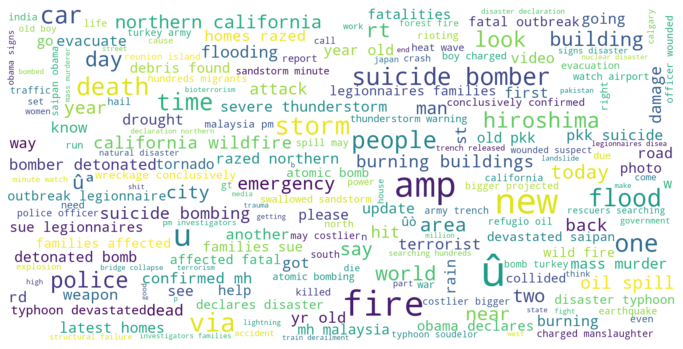

In [21]:
#Palabras que servirán para hacer un mejor modelo de clasificacion de desastres
disaster_tweets = train[train['target'] == 1]
disaster_string = []
frequency = {}

for t in disaster_tweets.text:
    disaster_string.append(t)
disaster_string = pd.Series(disaster_string).str.cat(sep=' ')

a = disaster_string.split()

for word in a:
    count = frequency.get(word, 0)
    frequency[word] = count +1 

frequency_list = frequency.keys()
sortedFrec = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
 
for words in sortedFrec:
    print(words, frequency[words])

positiveSorted = sortedFrec

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(disaster_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


like 348
amp 344
fire 252
get 229
new 225
via 220
news 201
people 200
one 197
video 166
emergency 158
disaster 157
police 142
would 137
u 136
body 130
time 130
still 129
us 128
california 121
storm 121
burning 121
crash 120
back 120
day 120
suicide 119
man 115
got 114
know 113
rt 111
buildings 110
first 108
world 106
see 105
going 104
bomb 104
two 103
pm 103
nuclear 103
fires 101
attack 101
love 101
today 99
killed 99
youtube 98
dead 98
year 98
w 96
go 96
car 94
gt 94
hiroshima 94
train 93
full 93
life 92
old 92
war 91
may 89
accident 89
families 88
good 87
think 86
watch 85
say 85
many 84
home 83
could 83
last 83
let 83
way 81
years 80
want 80
make 78
collapse 76
death 75
best 75
work 74
mh 74
mass 74
please 73
even 73
help 73
look 73
army 72
need 72
take 72
another 72
wildfire 72
really 71
û 71
bombing 71
lol 71
black 68
right 68
school 67
fatal 67
forest 66
hot 66
obama 65
water 65
northern 64
much 64
reddit 64
live 63
city 63
never 63
great 62
god 61
homes 61
legionnaires 61
bombe

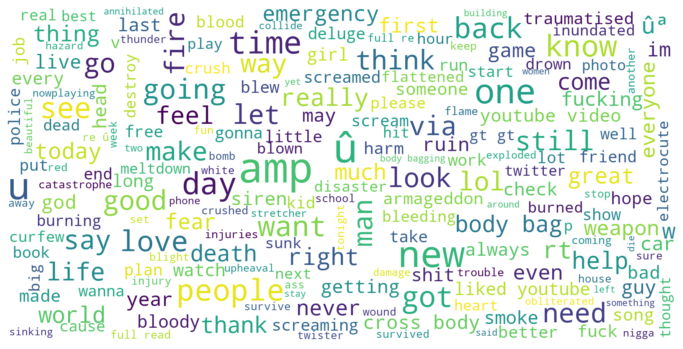

In [22]:
#Palabras que servirán para hacer un mejor modelo de clasificacion positivas
formal_tweets = train[train["target"] == 0]
noDisaster_String = []
for t in formal_tweets.text:
    noDisaster_String.append(t)
noDisaster_String = pd.Series(noDisaster_String).str.cat(sep=' ')

a = noDisaster_String.split()

for word in a:
    count = frequency.get(word, 0)
    frequency[word] = count +1 

frequency_list = frequency.keys()
sortedFrec = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
 
for words in sortedFrec:
    print(words, frequency[words])

negativeSorted = sortedFrec

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(noDisaster_String)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

3. Haga un análisis exploratorio de los datos

3. 1. ¿Qué palabra se repite más en cada una de las categorías?

In [29]:
train['keyword'].value_counts().nlargest(10)

nan           61
fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
harm          41
body bags     41
evacuate      40
fear          40
Name: keyword, dtype: int64

Palabras repetidas de primera categoría

In [32]:
pal_rep_1 = train[train['target'] == 0]['keyword'].value_counts().nlargest(10)
pal_rep_1

body bags     40
harm          37
armageddon    37
deluge        36
ruin          36
wrecked       36
twister       35
explode       35
fear          35
siren         35
Name: keyword, dtype: int64

Palabras repetidas de segunda categoría

In [33]:
pal_rep_2 = train[train['target'] == 1]['keyword'].value_counts().nlargest(10)
pal_rep_2

nan                42
wreckage           39
outbreak           39
derailment         39
typhoon            37
debris             37
oil spill          37
rescuers           32
suicide bombing    32
suicide bomb       32
Name: keyword, dtype: int64

In [35]:
pal_rep_1 = train[train['target'] == 0]['keyword'].value_counts()[:1].index.tolist()
pal_rep_1

['body bags']

In [37]:
pal_rep_2 = train[train['target'] == 1]['keyword'].value_counts()[:1].index.tolist()
pal_rep_2

['nan']

3. 2. Haga nube de palabras para visualizar las que aparecen con másfrecuencia

Nube de palabras repetidas de primera categoría

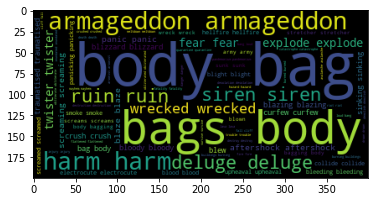

In [41]:
nube = WordCloud().generate(' '.join(map(str, train[train['target'] == 0]['keyword'])))
plt.imshow(nube)
plt.show()

Nube de palabras repetidas de segunda categoría

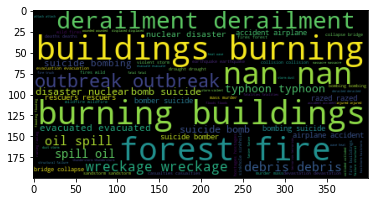

In [42]:
nube = WordCloud().generate(' '.join(map(str, train[train['target'] == 1]['keyword'])))
plt.imshow(nube)
plt.show()

3. 3. Hacer un histograma con las palabras que más se repiten

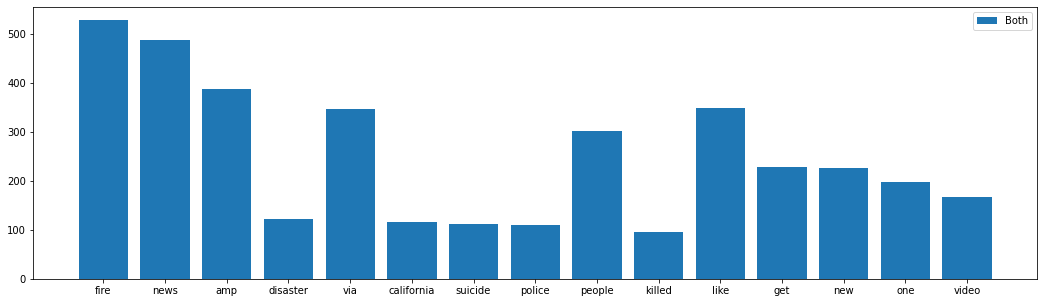

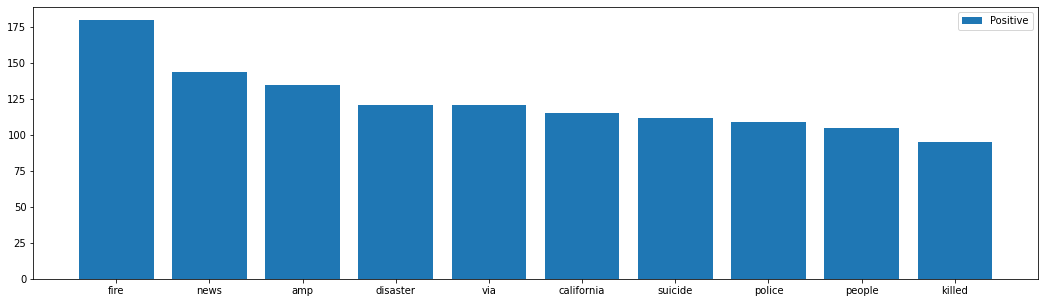

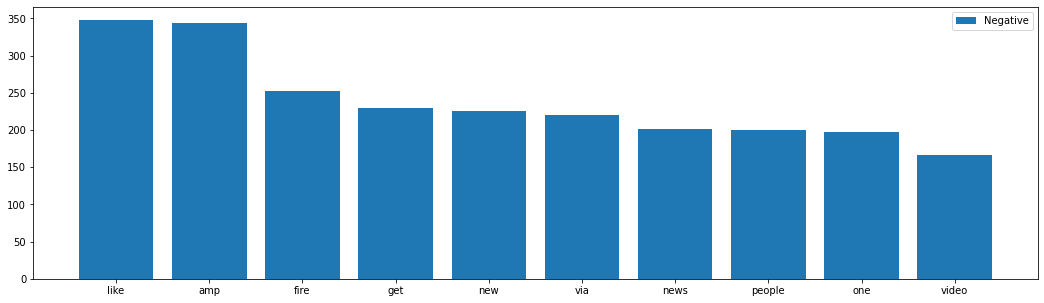

In [23]:
tenPosWords = list(positiveSorted.keys())[0:10]
tenPosFreq = list(positiveSorted.values())[0:10]

tenNegWords = list(negativeSorted.keys())[0:10]
tenNegFreq = list(negativeSorted.values())[0:10]

totPosNegWords = []
totPosNegFreq = []

# Mesh both arrays and sum their frequencies
for posi in tenPosWords:
  if tenNegWords.count(posi) > 0:
    totPosNegWords.append(posi)
    posInd = tenPosWords.index(posi)
    negInd = tenPosWords.index(posi)
    totalFreq = tenPosFreq[posInd] + tenNegFreq[negInd]
    totPosNegFreq.append(totalFreq)
  else:
    posInd = tenPosWords.index(posi)
    totPosNegWords.append(posi)
    totPosNegFreq.append(tenPosFreq[posInd])

for nega in tenNegWords:
  if tenPosWords.count(nega) == 0:
    negInd = tenNegWords.index(nega)
    totPosNegWords.append(nega)
    totPosNegFreq.append(tenNegFreq[negInd])

# Positivas y negativas
f, ax = plt.subplots(figsize=(18, 5))
plt.bar(totPosNegWords, totPosNegFreq, label="Both")
ax.legend()
plt.show()

# Positivas
f, ax = plt.subplots(figsize=(18, 5))
plt.bar(tenPosWords, tenPosFreq, label="Positive")
ax.legend()
plt.show()

# Negativas
f, ax = plt.subplots(figsize=(18, 5))
plt.bar(tenNegWords, tenNegFreq, label="Negative")
ax.legend()
plt.show()


4. Determinar que tan positivo o negativo es un tweet.

fire ->  0.3181818181818182
news ->  0.4098360655737705
amp ->  0.3023255813953488
disaster ->  0.30857142857142855
via ->  0.30057803468208094
california ->  0.31343283582089554
suicide ->  0.28434504792332266
police ->  0.29449838187702265
people ->  0.304635761589404
killed ->  0.2720306513409962


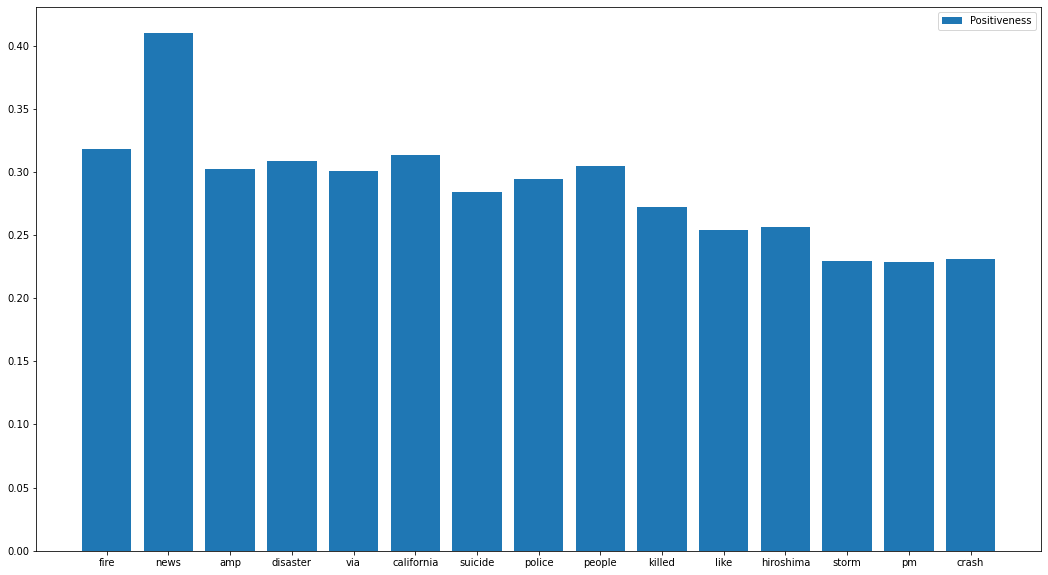

In [24]:
# Positivas
tenPosWords = list(positiveSorted.keys())
tenPosFreq = list(positiveSorted.values())

# Negativas
tenNegWords = list(negativeSorted.keys())
tenNegFreq = list(negativeSorted.values())

# Both
totPosNegWords = []
totPosNegFreq = []
totPositiveness = [] # Contains an index from -1 to 1 showing how positive or negative is a word. Being 1 Totally Positive and -1 Totally Negative

# Get total frequency per list
totalPositiveFrequency = 0
totalNegativeFrequency = 0

for freq in tenPosFreq:
  totalPositiveFrequency += freq
for freq in tenNegFreq:
  totalNegativeFrequency += freq

# Mesh both arrays and sum their frequencies
for posi in tenPosWords:
  if tenNegWords.count(posi) > 0: # Word is in both positive and negative tweets
    # Add word and get indexes
    totPosNegWords.append(posi)
    posInd = tenPosWords.index(posi)
    negInd = tenPosWords.index(posi)
    
    # Obtain frequencies
    positiveFreq = tenPosFreq[posInd]
    negativeFreq = tenNegFreq[negInd]
    totalFreq = positiveFreq + negativeFreq

    # Add frequency
    totPosNegFreq.append(totalFreq)

    positiveness = 0

    # Calculate positiveness
    if positiveFreq > negativeFreq: # More positive than negative
      # Multiply frequency over category per quantity over other category
      # positiveness = (positiveFreq/totalPositiveFrequency) * ((positiveFreq - negativeFreq)/(positiveFreq + negativeFreq))
      positiveness = (positiveFreq - negativeFreq)/(positiveFreq + negativeFreq)
    elif negativeFreq > positiveFreq:  # More negative than positive
      # positiveness = - (positiveFreq/totalPositiveFrequency) * ((positiveFreq - negativeFreq)/(positiveFreq + negativeFreq))
      positiveness = - ((positiveFreq - negativeFreq)/(positiveFreq + negativeFreq))
    elif positiveFreq == negativeFreq:  # Neutral - Only count over the total frequency of current category
      if positiveFreq/totalPositiveFrequency > negativeFreq/totalNegativeFrequency: # More frequent in positive tweets
        positiveness = positiveFreq / totalPositiveFrequency
      elif positiveFreq/totalPositiveFrequency < negativeFreq/totalNegativeFrequency: # More frequent in negative tweets
        positiveness = - negativeFreq / totalNegativeFrequency
      else: # Totally neutral
        positiveness = 0
    
    # Add positiveness
    totPositiveness.append(positiveness)

  else: # Word is only in positive tweets
    posInd = tenPosWords.index(posi)
    totPosNegWords.append(posi)
    posFreq = tenPosFreq[posInd]
    totPosNegFreq.append(posFreq)

    # Calculate and add positiveness
    positiveness = posFreq / totalPositiveFrequency
    totPositiveness.append(positiveness)

for nega in tenNegWords:
  if tenPosWords.count(nega) == 0:  # Word is only in negative tweets
    negInd = tenNegWords.index(nega)
    totPosNegWords.append(nega)

    # Get and add frequency
    negFreq = tenNegFreq[negInd]
    totPosNegFreq.append(negFreq)

    # Calculate and add positiveness
    positiveness = - negFreq / totalNegativeFrequency
    totPositiveness.append(positiveness)

# Show positiveness 
for i in  range(len(totPosNegWords[0:10])):
  print(totPosNegWords[i], "-> ", totPositiveness[i])

# Positivas y negativas
f, ax = plt.subplots(figsize=(18, 10))
plt.bar(totPosNegWords[0:15], totPositiveness[0:15], label="Positiveness")
ax.legend()
plt.show()

In [25]:
testinTrain = train.copy() # inOrder not to modifiy original

testinTrain["positiveness"] = 0

currentIndex = 0

for tweet in testinTrain["text"]:
  wordCollection = tweet.split()
  tweetPositiveness = 0
  totalOcurrences = 0

  for item in wordCollection:
    if totPosNegWords.count(item) > 0:
      wordInd = totPosNegWords.index(item)
      tweetPositiveness += totPositiveness[wordInd]
      totalOcurrences += 1
  
  # Divide by the total occurrences to maintain the value within the same range [-1, 1]
  if totalOcurrences > 0:
    tweetPositiveness /= totalOcurrences
  
  testinTrain.at[currentIndex, "positiveness"] = tweetPositiveness

  currentIndex += 1

# Show values significant to certain theta value
theta = 0.1
testinTrain[(testinTrain["positiveness"] > theta) | (testinTrain["positiveness"] < -theta)].sample(15)
    


,id,keyword,location,text,target,positiveness
3207,4601,emergency services,usa,join providence health amp services team see l...,0,0.309865
4485,6380,hostages,eastcarolina,hot c specially modified land stadium rescue h...,1,0.311863
6050,8647,sinkhole,above the snake line - #yonews,large sinkhole swallows entire pond lowndes co...,1,0.278523
2851,4097,displaced,uk,displaced disasters label legal status remain ...,0,0.145037
5098,7272,nuclear disaster,unknow,refugees nuclear disaster western japan beyond...,1,0.267046
937,1354,blown up,nowhere islands/smash manor,theboyofmasks thanks letting stay since manor ...,0,0.197515
4108,5837,hailstorm,canada,nice job calgary transit,0,0.256940
6097,8706,sinking,unknow,horrible sinking feeling youûªve home phone r...,0,0.344525
2442,3506,derailment,unknow,death railway track rains cannot take blame de...,1,0.330533
2978,4275,drowning,unknow,louis red jacket round aka drowning tears,0,0.336390


In [51]:
def sentiment(pal): 
    if TextBlob(pal).sentiment.polarity > 0: 
        return 'positivo'
    elif TextBlob(pal).sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negativo'

In [57]:
niv_positividad = pd.Series(train['keyword']).apply(lambda x: sentiment(str(x)))
niv_positividad.value_counts()

neutral     7112
negativo     338
positivo     163
Name: keyword, dtype: int64

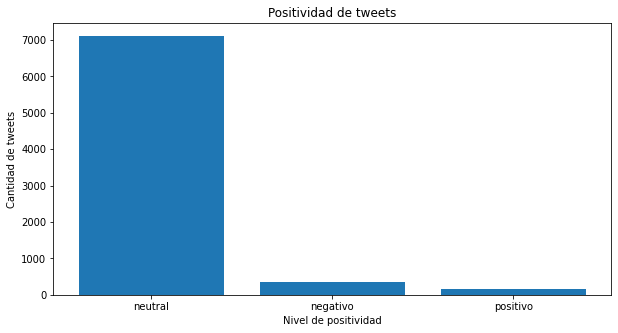

In [64]:
plt.figure(figsize=(10,5))
plt.bar(niv_positividad.value_counts().index, niv_positividad.value_counts().values)
plt.title("Positividad de tweets")
plt.ylabel("Cantidad de tweets")
plt.xlabel("Nivel de positividad")
plt.show()

4. 1. ¿Cuáles son los 10 tweets más negativos?

In [26]:
testinTrain[testinTrain["positiveness"] < 0].sort_values(by=['positiveness'], ascending=True).head(10)

,id,keyword,location,text,target,positiveness
113,163,aftershock,belgium,aftershock,0,-0.000315
131,190,aftershock,unknow,aftershock,0,-0.000315
820,1191,blizzard,unknow,stats,0,-0.000043
6745,9664,tornado,wherever i'm sent,ticklemeshawn evebrigid bet,0,-0.000043
255,363,annihilation,usa,souls punished withåêannihilation,0,-0.000029
4273,6071,heat wave,unknow,cherry print matching lipstick rediscovered na...,0,-0.000022
5564,7939,rainstorm,usa,nathanfillion hardly,0,-0.000021
2800,4027,disaster,"lima, peru",û¢i architect disasterû¢,0,-0.000019
6306,9009,stretcher,unknow,freeze fruits veggies,0,-0.000019
19,28,nan,unknow,goooooooaaaaaal,0,-0.000014


4. 2. ¿Cuáles son los 10 tweets más positivos? ¿

In [27]:
testinTrain[testinTrain["positiveness"] > 0].sort_values(by=['positiveness'], ascending=False).head(10)

,id,keyword,location,text,target,positiveness
247,352,annihilation,wild wild web,annihilating quarterstaff annihilation,1,0.466667
563,814,battle,unknow,young german stormtrooper engaged battle somme ìñ,1,0.463341
227,322,annihilated,uk,oryx symbol arabian peninsula annihilated hunters,1,0.460758
1100,1591,bombed,usa,cyhitheprynce bombed kanye elephantintheroom,1,0.455357
214,302,annihilated,unknow,annihilated abs,1,0.453704
1458,2102,casualty,usa,nowplaying dubstep hardstyle trap messy mix ev...,1,0.452433
969,1402,body bag,paignton,new ladies shoulder tote handbag faux leather ...,0,0.452029
981,1420,body bag,paignton,new ladies shoulder tote handbag faux leather ...,0,0.452029
974,1409,body bag,paignton,new ladies shoulder tote handbag faux leather ...,1,0.452029
234,334,annihilated,unknow,tomcatarts thus explaining annihilated case su...,1,0.451934


5. Cree una variable que contenga la “negatividad” de cada tweet.